In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
indices = ['']
testdf = pd.read_csv('../data/CRNHE0101-NC_Asheville_8_SSW.csv', index_col='DATE_TIME')

print(testdf.describe())


         WBANNO     LONGITUDE   LATITUDE  RELATIVE_HUMIDITY  SURFACE_PRESSURE  \
count  203848.0  2.038480e+05  203848.00      198258.000000     203826.000000   
mean    53877.0 -8.261000e+01      35.49          64.818449        919.820962   
std         0.0  4.263267e-14       0.00          32.043342         93.044102   
min     53877.0 -8.261000e+01      35.49           0.000000          0.000000   
25%     53877.0 -8.261000e+01      35.49          47.000000        926.000000   
50%     53877.0 -8.261000e+01      35.49          75.000000        929.500000   
75%     53877.0 -8.261000e+01      35.49          93.000000        932.700000   
max     53877.0 -8.261000e+01      35.49          99.000000        948.600000   

       SOLAR_RADIATION  ESTIMATED_10_METER_WIND_SPEED  DRY_BULB_TEMPERATURE_C  \
count    201129.000000                  202506.000000           198073.000000   
mean        151.281946                       0.907864               12.136238   
std         254.237734     

In [3]:
testdf = testdf[testdf.index >= 2004010101]
testdf = testdf[['APPARENT_TEMPERATURE_C','RELATIVE_HUMIDITY','SURFACE_PRESSURE','SOLAR_RADIATION','ESTIMATED_10_METER_WIND_SPEED','DRY_BULB_TEMPERATURE_C']]
testdf.rename(columns={"APPARENT_TEMPERATURE_C" : "T_out", "RELATIVE_HUMIDITY" : "RH_out", "SURFACE_PRESSURE" : "P_out", "SOLAR_RADIATION" : "I_glob", "ESTIMATED_10_METER_WIND_SPEED" : "u_wind", "DRY_BULB_TEMPERATURE_C" : "T_sky"}, inplace=True)
print(testdf)

            T_out  RH_out  P_out  I_glob  u_wind  T_sky
DATE_TIME                                              
2004010101   -3.6    78.0  936.8     0.0     0.5   -1.4
2004010102   -4.8    82.0  937.2     0.0     0.4   -2.6
2004010103   -5.2    85.0  937.5     0.0     0.4   -3.0
2004010104   -5.6    88.0  937.2     0.0     0.8   -3.1
2004010105   -5.7     0.0  937.0     0.0     0.6   -3.4
...           ...     ...    ...     ...     ...    ...
2024021616    8.8    59.0  925.8   207.8     1.1   10.3
2024021617   10.1    54.0  924.4   309.3     1.0   11.5
2024021618   12.1    47.0  923.4   389.7     1.4   13.7
2024021619   13.1    44.0  923.4   284.4     1.3   14.6
2024021620   13.9    42.0  922.4   187.1     0.9   15.1

[176444 rows x 6 columns]


Check for missing values

In [117]:
print('\033[1mTotal no. of NAs\033[0m \n', testdf.isna().sum(), sep='', end='\n\n')
print('\033[1mTotal no. of 0s\033[0m \n', (testdf == 0).sum(axis=0), sep='', end='\n\n')

print('\033[1mPercentage of NAs\033[0m \n', testdf.isna().sum()/len(testdf), sep='', end='\n\n')
print('\033[1mPercentage of 0s\033[0m \n', (testdf == 0).sum(axis=0)/len(testdf), sep='')

Total no. of NAs 
T_out     46106
RH_out    46047
P_out        21
I_glob       98
u_wind       98
T_sky       466
dtype: int64

Total no. of 0s 
T_out       961
RH_out     9920
P_out      1521
I_glob    69767
u_wind     3926
T_sky      1539
dtype: int64

Percentage of NAs 
T_out     0.320994
RH_out    0.320583
P_out     0.000146
I_glob    0.000682
u_wind    0.000682
T_sky     0.003244
dtype: float64

Percentage of 0s 
T_out     0.006691
RH_out    0.069064
P_out     0.010589
I_glob    0.485724
u_wind    0.027333
T_sky     0.010715
dtype: float64


In [95]:
print(testdf.describe())

               T_out         RH_out          P_out         I_glob  \
count  175793.000000  175903.000000  176416.000000  175903.000000   
mean       11.738133      66.256204     920.120075     149.502344   
std        10.574263      30.879302      91.184621     253.910399   
min       -23.600000       0.000000       0.000000       0.000000   
25%         3.200000      49.000000     925.900000       0.000000   
50%        12.900000      76.000000     929.400000       0.100000   
75%        20.400000      93.000000     932.600000     179.700000   
max        37.300000      99.000000     948.600000    1092.000000   

              u_wind          T_sky  
count  175903.000000  175793.000000  
mean        0.899330      12.127979  
std         0.866035       9.098122  
min         0.000000     -20.100000  
25%         0.100000       5.100000  
50%         0.600000      13.300000  
75%         1.500000      19.100000  
max         5.000000      36.400000  


there are relatively few NA values relative to the size of the dataset. Missing values appear to also sometimes be represented by a zero. Zeros in `u_wind` and `I_glob` appear to be legitimate.

In [78]:
type(data.columns.to_list())

list

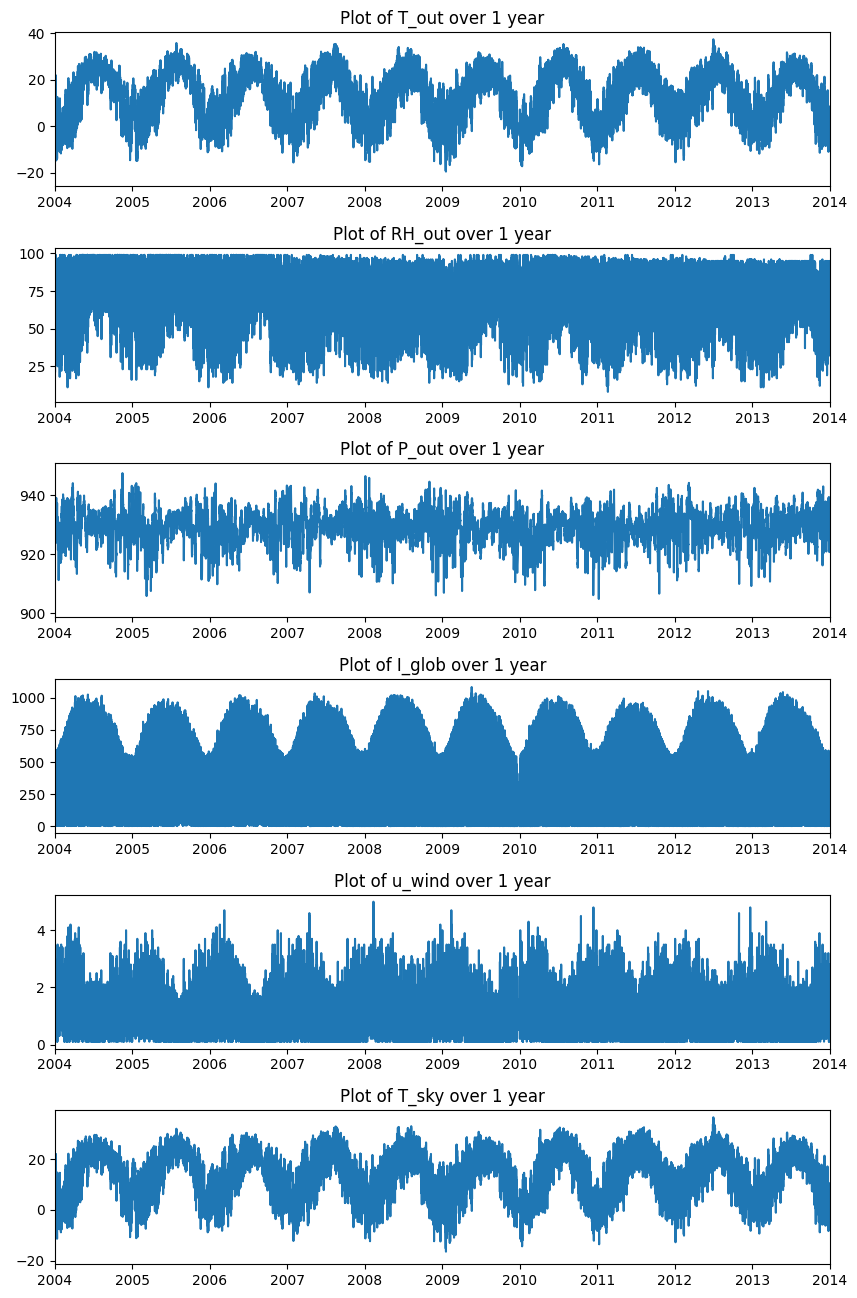

In [26]:
data = testdf.dropna()

time_series = pd.to_datetime(data.index, format='%Y%m%d%H')

fig, axs = plt.subplots(6,1,figsize=(10,16))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(data.columns.to_list())):
    axs[i].plot(time_series, data.iloc[:,i])
    
    axs[i].set_xlim([pd.to_datetime('2004-01-01'), pd.to_datetime('2014-01-01')])
    axs[i].set_title(f'Plot of {data.columns[i]} over 1 year')
    
plt.show()

In [118]:
testdf.to_csv('../data/NEW_WEATHER_DATA.csv')

Using regression imputation, remove the datapoints that are NA or 0. Ignore global irradiance as 0 value is definitely expected there

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = testdf.copy()
df.replace(0, np.nan, inplace=True)

imputer = IterativeImputer(min_value=0, random_state=123, max_iter=10, initial_strategy='mean')

regr_imputed_data = imputer.fit_transform(df)
regr_imputed_data = pd.DataFrame(regr_imputed_data, columns=testdf.columns, index=testdf.index)

C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [33]:
print(regr_imputed_data)

            T_out    RH_out  P_out  I_glob  u_wind  T_sky
DATE_TIME                                                
2004010101   -3.6  78.00000  936.8     0.0     0.5   -1.4
2004010102   -4.8  82.00000  937.2     0.0     0.4   -2.6
2004010103   -5.2  85.00000  937.5     0.0     0.4   -3.0
2004010104   -5.6  88.00000  937.2     0.0     0.8   -3.1
2004010105   -5.7  83.96376  937.0     0.0     0.6   -3.4
...           ...       ...    ...     ...     ...    ...
2024021616    8.8  59.00000  925.8   207.8     1.1   10.3
2024021617   10.1  54.00000  924.4   309.3     1.0   11.5
2024021618   12.1  47.00000  923.4   389.7     1.4   13.7
2024021619   13.1  44.00000  923.4   284.4     1.3   14.6
2024021620   13.9  42.00000  922.4   187.1     0.9   15.1

[176444 rows x 6 columns]


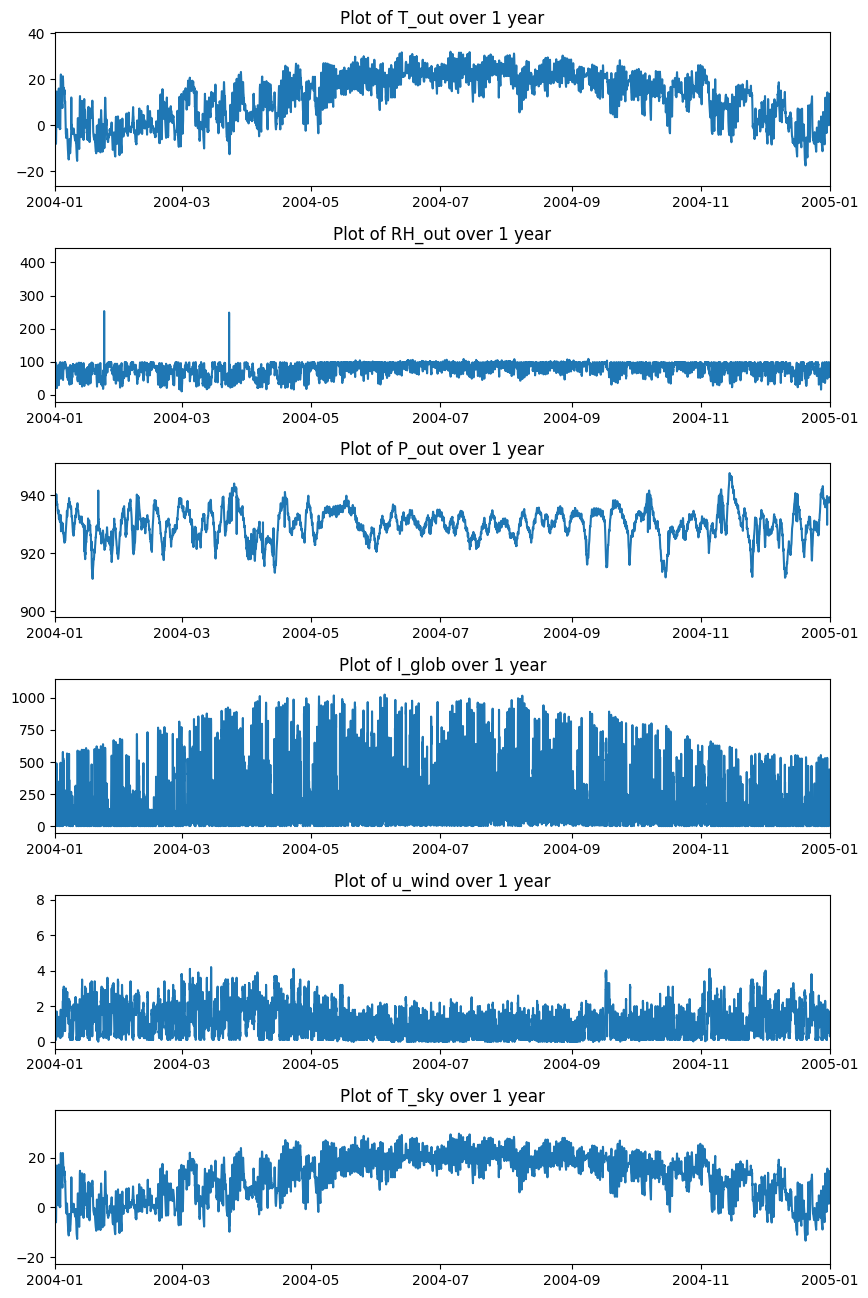

In [49]:
data = regr_imputed_data

time_series = pd.to_datetime(data.index, format='%Y%m%d%H')

fig, axs = plt.subplots(6,1,figsize=(10,16))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(data.columns.to_list())):
    axs[i].plot(time_series, data.iloc[:,i])
    
    axs[i].set_xlim([pd.to_datetime('2004-01-01'), pd.to_datetime('2005-01-01')])
    axs[i].set_title(f'Plot of {data.columns[i]} over 1 year')
    
plt.show()

In [63]:
regr_imputed_data = regr_imputed_data.set_index(time_series)
df = pd.DataFrame(regr_imputed_data)
df.index.names = ['time']
print(df)
df.to_csv('../data/regr_imputed_data.csv')

                     T_out    RH_out  P_out  I_glob  u_wind  T_sky
time                                                              
2004-01-01 01:00:00   -3.6  78.00000  936.8     0.0     0.5   -1.4
2004-01-01 02:00:00   -4.8  82.00000  937.2     0.0     0.4   -2.6
2004-01-01 03:00:00   -5.2  85.00000  937.5     0.0     0.4   -3.0
2004-01-01 04:00:00   -5.6  88.00000  937.2     0.0     0.8   -3.1
2004-01-01 05:00:00   -5.7  83.96376  937.0     0.0     0.6   -3.4
...                    ...       ...    ...     ...     ...    ...
2024-02-16 16:00:00    8.8  59.00000  925.8   207.8     1.1   10.3
2024-02-16 17:00:00   10.1  54.00000  924.4   309.3     1.0   11.5
2024-02-16 18:00:00   12.1  47.00000  923.4   389.7     1.4   13.7
2024-02-16 19:00:00   13.1  44.00000  923.4   284.4     1.3   14.6
2024-02-16 20:00:00   13.9  42.00000  922.4   187.1     0.9   15.1

[176444 rows x 6 columns]
